In [12]:
# elt
import pandas as pd
import numpy as np

# ols and iv models
import statsmodels.api as sm
import statsmodels.formula.api as smf

#visualization and animation
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython import display
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install linearmodels --user

In [4]:
from linearmodels.iv import IV2SLS

In [6]:
fulton_data = pd.read_csv("fulton_fish_market_data.txt", sep = '\t')

In [7]:
fulton_data.head()

,day1,day2,day3,day4,date,stormy,mixed,price,qty,rainy,cold,windspd,windspd2,pricelevel,totr,tots
0,1,0,0,0,911202,1,0,-0.430783,8.994421,1,0,2.995732,8.974412,0.650000,7232,8058
1,0,1,0,0,911203,1,0,0.000000,7.707063,0,0,2.995732,8.974412,1.000000,2110,2224
2,0,0,1,0,911204,0,1,0.072321,8.350194,1,1,2.813411,7.915280,1.075000,5247,4231
3,0,0,0,1,911205,1,0,0.247139,8.656955,0,1,3.036554,9.220662,1.280357,1290,5750
4,0,0,0,0,911206,1,0,0.664327,7.844241,0,1,3.036554,9.220662,1.943182,1717,2551


In [8]:
fulton_data.isnull().sum()

day1          0
day2          0
day3          0
day4          0
date          0
stormy        0
mixed         0
price         0
qty           0
rainy         0
cold          0
windspd       0
windspd2      0
pricelevel    0
totr          0
tots          0
dtype: int64

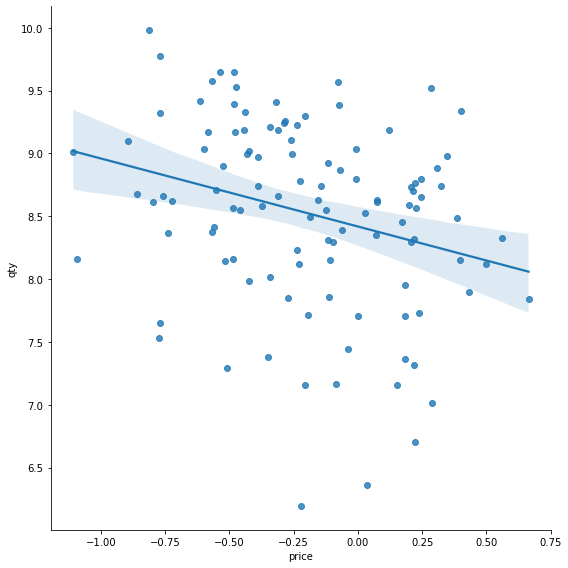

In [15]:
sns.pairplot(fulton_data,kind = "reg", size = 8, x_vars= ["price"], y_vars=["qty"] )

In [20]:
lm = smf.ols ("np.log(qty) ~ np.log(price)",data = fulton_data).fit()

LinAlgError: SVD did not converge

In [17]:
x = fulton_data ['price']
x = sm.add_constant(x)
y = fulton_data['qty']

ols = sm.OLS(y,x).fit()
ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    qty   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     9.167
Date:                Sun, 14 Jan 2024   Prob (F-statistic):            0.00308
Time:                        21:16:13   Log-Likelihood:                -119.35
No. Observations:                 111   AIC:                             242.7
Df Residuals:                     109   BIC:                             248.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4187      0.076    110.445      0.000       8.268       8.570
price         -0.5409      0.179     -3.028      0.003      -0.895      -0.187
==============================================================================
Omnibus:                       12.064   Durbin-Watson:                   1.556
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.644
Skew:                          -0.796   Prob(JB):                      0.00180
Kurtosis:                       3.448   Cond. No.                         2.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
iv_reg = IV2SLS.from_formula("qty ~ 1 + [price ~ stormy]", fulton_data).fit()
iv_reg.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                    qty   R-squared:                     -0.0002
Estimator:                    IV-2SLS   Adj. R-squared:                -0.0094
No. Observations:                 111   F-statistic:                    5.2772
Date:                Sun, Jan 14 2024   P-value (F-stat)                0.0216
Time:                        21:18:42   Distribution:                  chi2(1)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      8.3138     0.1175     70.750     0.0000      8.0835      8.5441
price         -1.0824     0.4712    -2.2972     0.0216     -2.0059     -0.1589
==============================================================================

Endogenous: price
Instruments: stormy
Robust Covariance (Heteroskedastic)
Debiased: False
"""